# Introduction

In 1966 Haggards and Isaacs discovered six so called micromomentary expressions. These expressions are being broadcast and received subconsiously by human beings with different levels of success. Those who master the skill seem to have a competitive advantage when dealing with other humans. This project attempts to find an automatic solution to the classification of these emotions using photographs.

# Data Analysis

The data used in this project is based on the Kaggle project "Challenges in Representation Learning: Facial Expression Recognition Challenge".

https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

In [1]:
#import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
#load data into a dataframe
df = pd.read_csv("Data/fer2013.csv")

The complete dataset consists of 35887 entries, each containing emotion, pixels and usage variables. The information is sufficient to represent a 48X48 greyscale image, including the corresponding microexpression of the person depicted in the picture.

In [3]:
#analyze the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


* Emotion is a categorical variable represented by a numeric value. 
    * 0: Angry
    * 1: Disgust
    * 2: Fear
    * 3: Happy
    * 4: Sad
    * 5: Surprise
    * 6: Neutral
* Pixel is a string variable containing 48X48 whitespace delimitted values between 0 and 255. Each value in the string represents a greyscale value for a specific pixel in the picture. The location of the pixel corresponds to the location of the value in the string. 
* Usage indicates whether the picture is intended for training or testing purposes.

In [4]:
df.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


Looking at the distribution of the dataset it becomes clear, that the data is not well balanced. Most of the observations are concentrated in the "Happy" category, while "Disgust" has a comparatevely low number of observations in the dataset. 

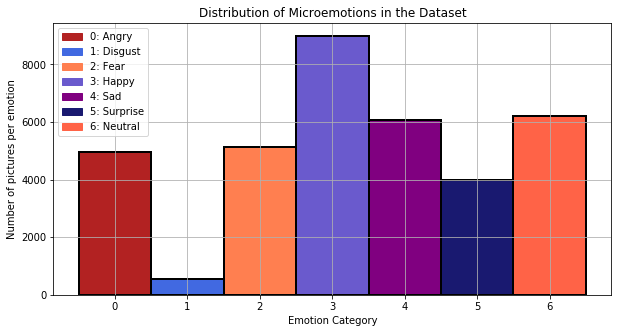

In [148]:
#plot the distribution of emotions

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

N, bins, patches = ax.hist(df['emotion'], bins=range(0,8), histtype='bar', align='left', edgecolor='black', linewidth=2)
plt.xlabel("Emotion Category")
plt.ylabel("Number of pictures per emotion")
plt.title("Distribution of Microemotions in the Dataset")
plt.grid(True)

colors = ['firebrick', 'royalblue', 'coral', 'slateblue', 'purple', 'midnightblue', 'tomato']
emotions = ['0: Angry', '1: Disgust', '2: Fear', '3: Happy', '4: Sad', '5: Surprise', '6: Neutral']

handles = []
for i, color in enumerate(colors):
    patches[i].set_facecolor(color)
    handles.append(mpatches.Patch(color=color, label=emotions[i]))
    
plt.legend(handles=handles)

plt.savefig('Pictures\data_distribution.png')
plt.show()

## Data Preprocessing

## Format and Shape transformation

The pixel data provided in the dataset is saved in a single column as a string value. In order for the pixel values to be used in a machine learning architecture the string value is transformed into a 4 dimensional numpy array.

In [6]:
#split the 'pixels' string by whitespace and save the result as a list
X = df['pixels'].apply(np.core.defchararray.split)

In [7]:
#create a numpy array and transform str into int simultaneously
X = np.array([list(map(int, x)) for x in X])

In [8]:
#Reshape into a 4 dimensional numpy array
X = X.reshape(X.shape[0], 48, 48, 1)

The dimensions of the numpy array have the following interpretations.
* Number of pictures
* Length of the picture
* Width of the picture
* Depth of the picture

The depth dimension is set to 1 as the dataset only contains greyscale information and there is no need for a 3 dimensional color space.

In [9]:
X.shape

(35887, 48, 48, 1)

In [156]:
#transform the emotion output into a numpy array
y = df['emotion'].values

## Data Splitting

In order to reduce overfitting the data is split into a training, cross-validation and testing datasets. The "usage" flag is ignored, as there is no classification for cross-validation. Due to the imbalance in the distribution of the microemotions the dataset is stratified while splitting the dataset in order to keep the distribution similar in the three datasets.


In [11]:
#use the stratify command in order to keep the distributions similar
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                          test_size=0.2, random_state = 42)

## Data Rescaling

In [13]:
#normalize the data between 0 and 1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_valid = X_valid.astype('float32')/255

## One Hot Encoding

In [14]:
from keras.utils import np_utils

# one hot encoding for the 7 categories
y_train = np_utils.to_categorical(y_train, 7)
y_test = np_utils.to_categorical(y_test, 7)
y_valid = np_utils.to_categorical(y_valid, 7)

c:\users\avadi\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Draw the data

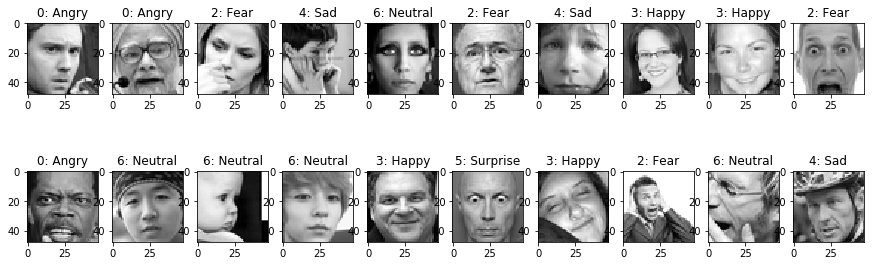

In [157]:
#draw the first 20 images
fig = plt.figure(figsize=(15, 5))
for i in range(20):
    ax = fig.add_subplot(2, 10, i+1)
    ax.imshow(np.squeeze(X[i]), cmap='gray')
    ax.set_title(emotions[y[i]])
plt.savefig('Pictures\pictures_example.png')

## How confident can a human being assign an emotion to a picture?

Try assigning a micro emotion without looking at the graph below

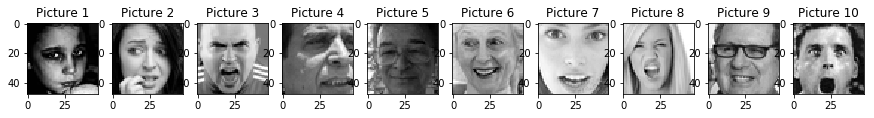

In [179]:
#draw the first 20 images
fig = plt.figure(figsize=(15, 2))
for i in range(10):
    x = i + 20
    ax = fig.add_subplot(1, 10, i+1)
    ax.imshow(np.squeeze(X[x]), cmap='gray')
    ax.set_title("Picture " + str(i+1))
plt.savefig('Pictures\pictures_example_diff.png')

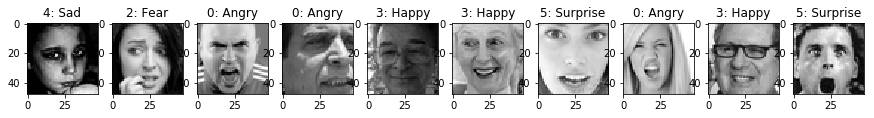

In [177]:
#draw the first 20 images
fig = plt.figure(figsize=(15, 2))
for i in range(10):
    x = i + 20
    ax = fig.add_subplot(1, 10, i+1)
    ax.imshow(np.squeeze(X[x]), cmap='gray')
    ax.set_title(emotions[y[x]])
plt.savefig('Pictures\pictures_example_diff_text.png')

# Benchmark Model

The MLP (Multilayer Perceptron) is going to used as a benchmark for all the models, that are going to be implemented afterwords.

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               230500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
__________

In [17]:
#this part is necessary for Graphviz under Windows. Uncomment or change directory if necessary
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [18]:
#save the graph of the model
from keras.utils import plot_model
plot_model(model, to_file='Pictures\MLP_model.png', show_shapes=True, show_layer_names=True)

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [20]:
#train the model
from keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [EarlyStopping(monitor='val_loss', patience=10, verbose=0),
            ModelCheckpoint(filepath='hdf5\MLP_emotion.model.best.hdf5', verbose=1, save_best_only=True)]
hist = model.fit(X_train, y_train, batch_size=128, epochs=100, 
                 validation_data=(X_valid, y_valid), callbacks=callbacks, verbose=1, shuffle=True)

Train on 22967 samples, validate on 5742 samples
Epoch 1/100
22967/22967 [==============================] - 12s 530us/step - loss: 1.8553 - acc: 0.2357 - val_loss: 1.8146 - val_acc: 0.2473

Epoch 00001: val_loss improved from inf to 1.81457, saving model to hdf5\MLP_emotion.model.best.hdf5
Epoch 2/100
22967/22967 [==============================] - 3s 147us/step - loss: 1.8068 - acc: 0.2481 - val_loss: 1.7956 - val_acc: 0.2457

Epoch 00002: val_loss improved from 1.81457 to 1.79561, saving model to hdf5\MLP_emotion.model.best.hdf5
Epoch 3/100
22967/22967 [==============================] - 3s 151us/step - loss: 1.7879 - acc: 0.2591 - val_loss: 1.7579 - val_acc: 0.2774

Epoch 00003: val_loss improved from 1.79561 to 1.75785, saving model to hdf5\MLP_emotion.model.best.hdf5
Epoch 4/100
22967/22967 [==============================] - 3s 150us/step - loss: 1.7738 - acc: 0.2711 - val_loss: 1.7582 - val_acc: 0.3008

Epoch 00004: val_loss did not improve from 1.75785
Epoch 5/100
22967/22967 [===

22967/22967 [==============================] - 3s 138us/step - loss: 1.6558 - acc: 0.3502 - val_loss: 1.6322 - val_acc: 0.3612

Epoch 00040: val_loss improved from 1.65600 to 1.63216, saving model to hdf5\MLP_emotion.model.best.hdf5
Epoch 41/100
22967/22967 [==============================] - 4s 155us/step - loss: 1.6580 - acc: 0.3455 - val_loss: 1.6484 - val_acc: 0.3563

Epoch 00041: val_loss did not improve from 1.63216
Epoch 42/100
22967/22967 [==============================] - 3s 140us/step - loss: 1.6515 - acc: 0.3550 - val_loss: 1.6379 - val_acc: 0.3680

Epoch 00042: val_loss did not improve from 1.63216
Epoch 43/100
22967/22967 [==============================] - 4s 156us/step - loss: 1.6500 - acc: 0.3542 - val_loss: 1.6502 - val_acc: 0.3483

Epoch 00043: val_loss did not improve from 1.63216
Epoch 44/100
22967/22967 [==============================] - 4s 174us/step - loss: 1.6454 - acc: 0.3577 - val_loss: 1.7343 - val_acc: 0.3124

Epoch 00044: val_loss did not improve from 1.63216

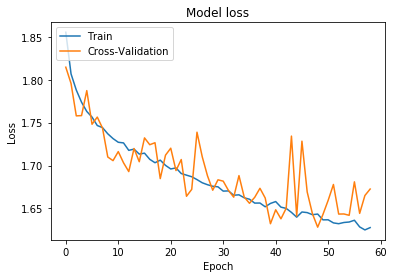

In [21]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.savefig('Pictures\model_loss_mlp.png')
plt.show()

### Confusion Matrix
A confusion matrix is a visual representation of a performance of a classification model. 

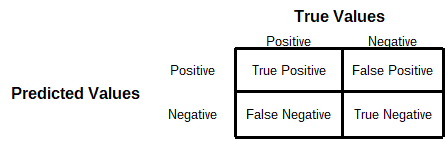

The picture above shows a confusion matrix for a binary classifier. 
- True Positives contains a number (or percentage) of entries in the dataset, that were classified as being positive, which in turn are positive.
- True Negatives contains a number (or percentage) of entries in the dataset, that were classified as being negative, which in turn are negative.
- False Positives contains a number (or percentage) of entries in the dataset, that were classified as being positive, which in turn are negative. This is also called Type-1 Error.
- False Negative contains a number (or percentage) of entries in the dataset, that were classified as being negative, which in turn are positive. This is also called Type-2 Error.

In [22]:
#function for the confusion matrix
#the implementation is based on 
#http://scikit-learn.org/stable/auto_examples/model_selection/
#plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
from sklearn.metrics import confusion_matrix
import itertools
def conf_matrix(true, prediction, path):
    
    cm = confusion_matrix(true, prediction)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, plt.cm.Blues)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(emotions))
    plt.xticks(tick_marks, emotions, rotation=45)
    plt.yticks(tick_marks, emotions)


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.ylabel('True Emotion')
    plt.xlabel('Predicted Emotion')
    plt.tight_layout()
    plt.savefig(path)
    plt.show()

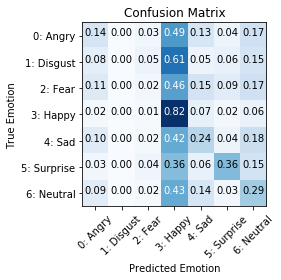

In [25]:
model.load_weights('hdf5\MLP_emotion.model.best.hdf5')
prediction = np.argmax(model.predict(X_test), axis=1)
true = np.argmax(y_test, axis = 1)
conf_matrix(true, prediction, 'Pictures\confusion_MLP.png')

The benchmark model clearly tends to classify pictures into the "Happy" category. This is called the accuracy paradox.

### ROD and AUC

ROC (receiver operating characteristic curve) is a plot of True Positive Rate (TPR) on the Y – axis and False Positive Rate (FPR) on the X-axis for all classification threshholds.

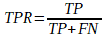

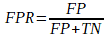

The ROC Curve for a bad model draws a 45 degree line through the origin. A better model always draws points above this line. In order to compare different models the area under the ROC (AUC) is calculated for each model and compared. The values of the AUC can lie between 0.5 (45 degree line) and 1 (a perfect prediction model). 
To calculate the AUC for a non binary model the so called One-Vs-All approach is taken. In this approach for each category the classification is seen as a binary problem where all other categories are seen as one “other” category. Therefore in this project 7 AUC values are going to be calculated for each model and compared individually.

In [26]:
#Function to print out the Area under the ROC values using the one-vs-all approac
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

def roc_auc(pred, true, num_categories):
    for i in range(num_categories):
        class_dictionary = {x:0 if x!=i else 1 for x in range(num_categories) }
        pred_class = np.array([class_dictionary[i] for i in pred])
        true_class = np.array([class_dictionary[i] for i in true])
        fpr, tpr, thresholds = roc_curve(true_class, pred_class)
        auc_category = auc(fpr, tpr)
        auc_str = f"{auc_category:5.2f} "
        print(emotions[i] + "" + auc_str)

In [27]:
roc_auc(prediction, true, 7)

0: Angry 0.54 
1: Disgust 0.50 
2: Fear 0.50 
3: Happy 0.69 
4: Sad 0.57 
5: Surprise 0.66 
6: Neutral 0.58 


The ROC values for the benchmark model are very close to 0.5

## Convolutional Neural Networks

Convolutional neural networks (CNN) are well known for their performance in visual classification. The ImageNet challenge, an image classification competition, brought forth AlexNet, VGGNet, ResNet and so on, deep CNN architectures that were able to perform extremely well in the competition. 
Considering that CNNs have outperformed other architectures in visual classification, CNNs are a logical choice for the classification of facial expressions. Grayscale images are going to be used as input into the neural network, while a softmax activation function will be used for the calculation of the probability of a certain expression. 

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 128)         32896     
__________

In [29]:
plot_model(model, to_file='Pictures\CNN_model.png', show_shapes=True, show_layer_names=True)

In [30]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [31]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# train the CNN model
callbacks = [EarlyStopping(monitor='val_loss', patience=10, verbose=0),
            ModelCheckpoint(filepath='hdf5\CNN_emotion.model.best.hdf5', verbose=1, save_best_only=True)]
hist = model.fit(X_train, y_train, batch_size=128, epochs=100,
          validation_data=(X_valid, y_valid), callbacks=callbacks, 
          verbose=2, shuffle=True)

Train on 22967 samples, validate on 5742 samples
Epoch 1/100
 - 8s - loss: 1.8240 - acc: 0.2437 - val_loss: 1.8019 - val_acc: 0.2457

Epoch 00001: val_loss improved from inf to 1.80195, saving model to hdf5\CNN_emotion.model.best.hdf5
Epoch 2/100
 - 4s - loss: 1.7601 - acc: 0.2721 - val_loss: 1.6994 - val_acc: 0.3239

Epoch 00002: val_loss improved from 1.80195 to 1.69937, saving model to hdf5\CNN_emotion.model.best.hdf5
Epoch 3/100
 - 4s - loss: 1.6303 - acc: 0.3525 - val_loss: 1.6050 - val_acc: 0.3783

Epoch 00003: val_loss improved from 1.69937 to 1.60496, saving model to hdf5\CNN_emotion.model.best.hdf5
Epoch 4/100
 - 4s - loss: 1.5487 - acc: 0.3912 - val_loss: 1.4899 - val_acc: 0.4220

Epoch 00004: val_loss improved from 1.60496 to 1.48989, saving model to hdf5\CNN_emotion.model.best.hdf5
Epoch 5/100
 - 4s - loss: 1.4796 - acc: 0.4226 - val_loss: 1.4295 - val_acc: 0.4547

Epoch 00005: val_loss improved from 1.48989 to 1.42950, saving model to hdf5\CNN_emotion.model.best.hdf5
Epoch

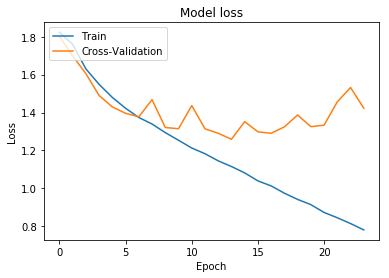

In [33]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.savefig('Pictures\model_loss_cnn.png')
plt.show()

Early stopping kicks in after 24 epochs.

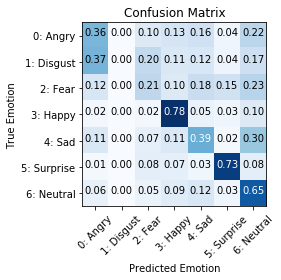

In [180]:
#Draw a confusion matrix for the CNN model
model.load_weights('hdf5\CNN_emotion.model.best.hdf5')
prediction = np.argmax(model.predict(X_test), axis=1)
true = np.argmax(y_test, axis = 1)
conf_matrix(true, prediction, 'Pictures\confusion_CNN.png')

This model outperforms the benchmark, but some categories especially "Disgust" are misclassified very often.

In [35]:
roc_auc(prediction, true, 7)

0: Angry 0.65 
1: Disgust 0.50 
2: Fear 0.58 
3: Happy 0.84 
4: Sad 0.64 
5: Surprise 0.84 
6: Neutral 0.73 


## Training Weights and Regularization

In order to reduce the emphasis on certain weights regularization and class weights are used in the CNN Model

In [36]:
#weights are based on the number of observations in the dataset
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

y = y_train

y_integers = np.argmax(y, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)

d_class_weights = dict(enumerate(class_weights))

Otherwise the model does not differ from the original CNN model

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import regularizers

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001), 
                        input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 16)        80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 128)         32896     
__________

In [38]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [39]:
from keras.callbacks import ModelCheckpoint   

# train the model
callbacks = [EarlyStopping(monitor='val_loss', patience=10, verbose=0),
                ModelCheckpoint(filepath='hdf5\CNN_weights_emotion.model.best.hdf5', verbose=1, save_best_only=True)]
hist = model.fit(X_train, y_train, batch_size=128, epochs=50, 
          class_weight=d_class_weights,
          validation_data=(X_valid, y_valid), callbacks=callbacks, 
          verbose=2, shuffle=True)

Train on 22967 samples, validate on 5742 samples
Epoch 1/50
 - 5s - loss: 1.9648 - acc: 0.1589 - val_loss: 1.9362 - val_acc: 0.1775

Epoch 00001: val_loss improved from inf to 1.93625, saving model to hdf5\CNN_weights_emotion.model.best.hdf5
Epoch 2/50
 - 4s - loss: 1.9218 - acc: 0.1935 - val_loss: 1.8742 - val_acc: 0.2283

Epoch 00002: val_loss improved from 1.93625 to 1.87421, saving model to hdf5\CNN_weights_emotion.model.best.hdf5
Epoch 3/50
 - 4s - loss: 1.8629 - acc: 0.2169 - val_loss: 1.8520 - val_acc: 0.2349

Epoch 00003: val_loss improved from 1.87421 to 1.85199, saving model to hdf5\CNN_weights_emotion.model.best.hdf5
Epoch 4/50
 - 4s - loss: 1.8188 - acc: 0.2053 - val_loss: 1.7753 - val_acc: 0.2591

Epoch 00004: val_loss improved from 1.85199 to 1.77530, saving model to hdf5\CNN_weights_emotion.model.best.hdf5
Epoch 5/50
 - 4s - loss: 1.7926 - acc: 0.2205 - val_loss: 1.7903 - val_acc: 0.2440

Epoch 00005: val_loss did not improve from 1.77530
Epoch 6/50
 - 4s - loss: 1.7575 

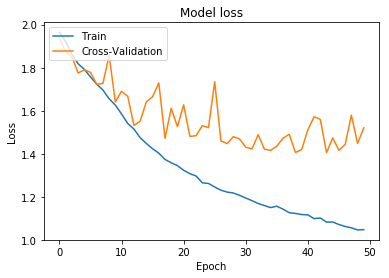

In [40]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.savefig('Pictures\model_loss_weights.png')
plt.show()

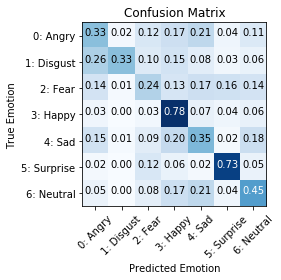

In [41]:
model.load_weights('hdf5\CNN_weights_emotion.model.best.hdf5')
prediction = np.argmax(model.predict(X_test), axis=1)
true = np.argmax(y_test, axis = 1)
conf_matrix(true, prediction, 'Pictures\confusion_CNN_weights.png')

In [42]:
roc_auc(prediction, true, 7)

0: Angry 0.62 
1: Disgust 0.66 
2: Fear 0.58 
3: Happy 0.81 
4: Sad 0.61 
5: Surprise 0.84 
6: Neutral 0.67 


Even though this is the best model when it comes to the "Disgust" category there is a relatively large tradeoff.

## Data Augmentation
The following implementation is based on the provided link.
- https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

Data augmentation distorts original pictures in some ways with some probability in order for the model to learn the underlying patterns and thus reduce the danger of overfitting. 

In [97]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 48, 48, 16)        80        
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 24, 24, 32)        2080      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 6, 6, 128)         32896     
__________

In [98]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

Here data augmentation is introduced. Width shift, height shift and horizontal flip

In [99]:
#train the model using the fit_generator
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

batch_size = 128
epochs = 100

callbacks = [EarlyStopping(monitor='val_loss', patience=10, verbose=0),
                ModelCheckpoint(filepath='hdf5\CNN_aug_emotion.model.best.hdf5', verbose=1, save_best_only=True)]

hist = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=callbacks, validation_data=(X_valid, y_valid)
                   )

Epoch 1/100
 - 12s - loss: 1.8225 - acc: 0.2446 - val_loss: 1.8173 - val_acc: 0.2299

Epoch 00001: val_loss improved from inf to 1.81729, saving model to hdf5\CNN_aug_emotion.model.best.hdf5
Epoch 2/100
 - 10s - loss: 1.7910 - acc: 0.2531 - val_loss: 1.7742 - val_acc: 0.2522

Epoch 00002: val_loss improved from 1.81729 to 1.77417, saving model to hdf5\CNN_aug_emotion.model.best.hdf5
Epoch 3/100
 - 10s - loss: 1.7495 - acc: 0.2811 - val_loss: 1.6555 - val_acc: 0.3208

Epoch 00003: val_loss improved from 1.77417 to 1.65547, saving model to hdf5\CNN_aug_emotion.model.best.hdf5
Epoch 4/100
 - 10s - loss: 1.6628 - acc: 0.3311 - val_loss: 1.5747 - val_acc: 0.3727

Epoch 00004: val_loss improved from 1.65547 to 1.57474, saving model to hdf5\CNN_aug_emotion.model.best.hdf5
Epoch 5/100
 - 10s - loss: 1.6037 - acc: 0.3649 - val_loss: 1.5497 - val_acc: 0.3922

Epoch 00005: val_loss improved from 1.57474 to 1.54967, saving model to hdf5\CNN_aug_emotion.model.best.hdf5
Epoch 6/100
 - 10s - loss: 1.


Epoch 00050: val_loss did not improve from 1.09536


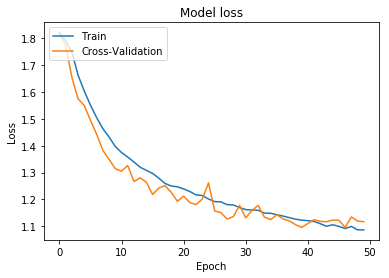

In [100]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.savefig('Pictures\model_augmentation.png')
plt.show()

The loss between the training and the cross-validation datasets do not diverge very far. There might be some room from improvement, as there seems not to be too much overfitting.

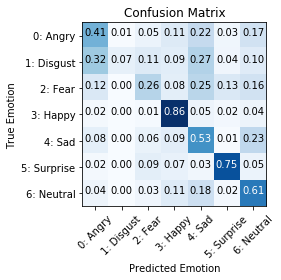

In [101]:
model.load_weights('hdf5\CNN_aug_emotion.model.best.hdf5')
prediction = np.argmax(model.predict(X_test), axis=1)
true = np.argmax(y_test, axis = 1)
conf_matrix(true, prediction, 'Pictures\confusion_CNN_aug.png')

In [102]:
roc_auc(prediction, true, 7)

0: Angry 0.68 
1: Disgust 0.54 
2: Fear 0.61 
3: Happy 0.88 
4: Sad 0.70 
5: Surprise 0.86 
6: Neutral 0.74 


This model improves the performance of the benchmark model. Although there is a lot of room for further improvement especially in the categories "Disgust" and "Fear"

# CNN with Augmentation, Regularization and Parameter Tweaking

##  This part of the notebook was used as a playground to experiment with different input parameters. Change parameters if needed.

In [137]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu',
                        input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 48, 48, 16)        80        
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 24, 24, 32)        2080      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 6, 6, 128)         32896     
__________

In [138]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [139]:
#train the model using the fit_generator
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

batch_size = 128
epochs = 100

callbacks = [EarlyStopping(monitor='val_loss', patience=10, verbose=0),
                ModelCheckpoint(filepath='hdf5\CNN_different.model.best.hdf5', verbose=1, save_best_only=True)]

hist = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=callbacks, validation_data=(X_valid, y_valid), 
                    class_weight=d_class_weights
                   )

Epoch 1/100
 - 14s - loss: 1.9393 - acc: 0.1511 - val_loss: 1.9535 - val_acc: 0.1642

Epoch 00001: val_loss improved from inf to 1.95348, saving model to hdf5\CNN_different.model.best.hdf5
Epoch 2/100
 - 10s - loss: 1.9188 - acc: 0.1963 - val_loss: 1.8978 - val_acc: 0.2281

Epoch 00002: val_loss improved from 1.95348 to 1.89777, saving model to hdf5\CNN_different.model.best.hdf5
Epoch 3/100
 - 10s - loss: 1.8909 - acc: 0.2231 - val_loss: 1.8376 - val_acc: 0.2508

Epoch 00003: val_loss improved from 1.89777 to 1.83756, saving model to hdf5\CNN_different.model.best.hdf5
Epoch 4/100
 - 10s - loss: 1.8485 - acc: 0.2387 - val_loss: 1.8033 - val_acc: 0.2861

Epoch 00004: val_loss improved from 1.83756 to 1.80325, saving model to hdf5\CNN_different.model.best.hdf5
Epoch 5/100
 - 10s - loss: 1.8112 - acc: 0.2458 - val_loss: 1.7535 - val_acc: 0.2858

Epoch 00005: val_loss improved from 1.80325 to 1.75355, saving model to hdf5\CNN_different.model.best.hdf5
Epoch 6/100
 - 10s - loss: 1.7709 - acc

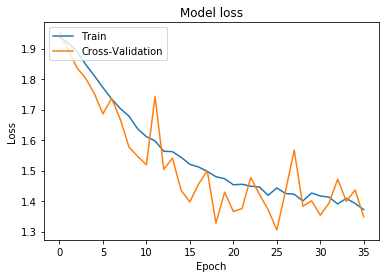

In [140]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.savefig('Pictures\model_diff.png')
plt.show()

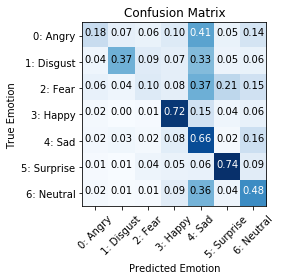

In [141]:
model.load_weights('hdf5\CNN_different.model.best.hdf5')
prediction = np.argmax(model.predict(X_test), axis=1)
true = np.argmax(y_test, axis = 1)
conf_matrix(true, prediction, 'Pictures\confusion_CNN_diff.png')

## Transfer Learning

Transfer learning is the usage of the predefined and pretrained models. Weights and architecture can be donwloaded and used as input for other models.

This implementation is based on the following link:
https://medium.com/@14prakash/transfer-learning-using-keras-d804b2e04ef8

In [128]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

#transformation into a 3 dimensional space is required as VGG16 was trained on colored images
X_train_3dim = np.resize(X_train, (22967, 48, 48, 3))
X_valid_3dim = np.resize(X_valid, (5742, 48, 48, 3))
X_test_3dim = np.resize(X_valid, (7178, 48, 48, 3))

model = VGG16(weights='imagenet', include_top=False, input_shape=X_train_3dim.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [129]:
# do not train the weights of the VGG architecture
for layer in model.layers:
    layer.trainable = True

In [130]:
output = model.output
x = GlobalAveragePooling2D()(output)
x = Dense(100, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(100, activation="relu")(x)
predictions = Dense(7, activation="softmax")(x)

In [131]:
model_final = Model(input = model.input, output = predictions)

c:\users\avadi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [132]:
from keras import optimizers
model_final.compile(loss = "categorical_crossentropy", optimizer = 'rmsprop', metrics=["accuracy"])

In [133]:
from keras.callbacks import ModelCheckpoint   

# train the model
callbacks = [EarlyStopping(monitor='val_loss', patience=10, verbose=0),
            ModelCheckpoint(filepath='hdf5\Transfer_emotion.model.best.hdf5', verbose=1, 
                               save_best_only=True)]
hist = model_final.fit(X_train_3dim, y_train, batch_size=128, epochs=50,
          validation_data=(X_valid_3dim, y_valid), callbacks=callbacks, 
          verbose=2, shuffle=True)

Train on 22967 samples, validate on 5742 samples
Epoch 1/50
 - 40s - loss: 13.3538 - acc: 0.1675 - val_loss: 13.3026 - val_acc: 0.1747

Epoch 00001: val_loss improved from inf to 13.30262, saving model to hdf5\Transfer_emotion.model.best.hdf5
Epoch 2/50
 - 34s - loss: 13.4113 - acc: 0.1679 - val_loss: 13.3026 - val_acc: 0.1747

Epoch 00002: val_loss did not improve from 13.30262
Epoch 3/50
 - 35s - loss: 13.4113 - acc: 0.1679 - val_loss: 13.3026 - val_acc: 0.1747

Epoch 00003: val_loss did not improve from 13.30262
Epoch 4/50
 - 36s - loss: 13.4106 - acc: 0.1680 - val_loss: 13.3026 - val_acc: 0.1747

Epoch 00004: val_loss did not improve from 13.30262
Epoch 5/50
 - 36s - loss: 13.4113 - acc: 0.1679 - val_loss: 13.3026 - val_acc: 0.1747

Epoch 00005: val_loss did not improve from 13.30262
Epoch 6/50
 - 36s - loss: 13.4106 - acc: 0.1680 - val_loss: 13.3026 - val_acc: 0.1747

Epoch 00006: val_loss did not improve from 13.30262
Epoch 7/50
 - 36s - loss: 13.4120 - acc: 0.1679 - val_loss: 13

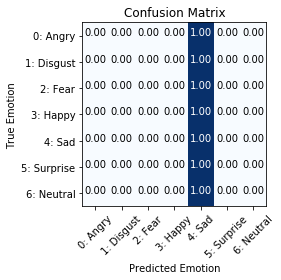

In [135]:
model_final.load_weights('hdf5\Transfer_emotion.model.best.hdf5')
prediction = np.argmax(model_final.predict(X_test_3dim), axis=1)
true = np.argmax(y_test, axis = 1)
conf_matrix(true, prediction, 'Pictures\confusion_transfer.png')

In [136]:
roc_auc(prediction, true, 7)

0: Angry 0.50 
1: Disgust 0.50 
2: Fear 0.50 
3: Happy 0.50 
4: Sad 0.50 
5: Surprise 0.50 
6: Neutral 0.50 


The performance of the model is worse than the benchmark model. Here for some reason all pictures are classified as "Sad"